In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
original = cv2.imread('2.jpg', 0)

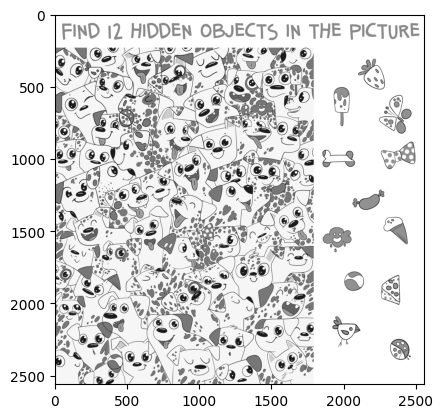

In [89]:
plt.imshow(original, cmap='gray')

In [90]:
objects = []

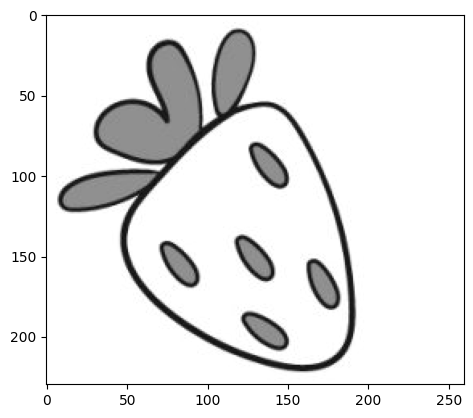

In [91]:
strawberry = original[300:530, 2090:2350]
plt.imshow(strawberry, cmap='gray')
objects.append(strawberry)

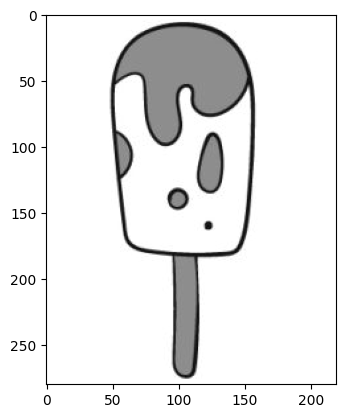

In [92]:
ice_cream = original[500:780, 1880:2100]
plt.imshow(ice_cream, cmap='gray')
objects.append(ice_cream)

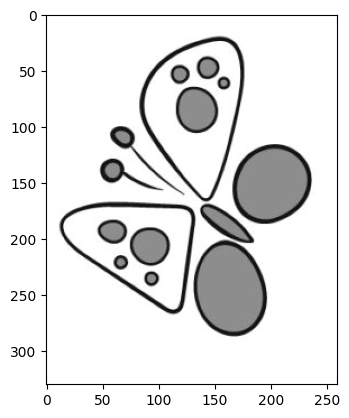

In [93]:
butterfly = original[540:870, 2230:2490]
plt.imshow(butterfly, cmap='gray')
objects.append(butterfly)

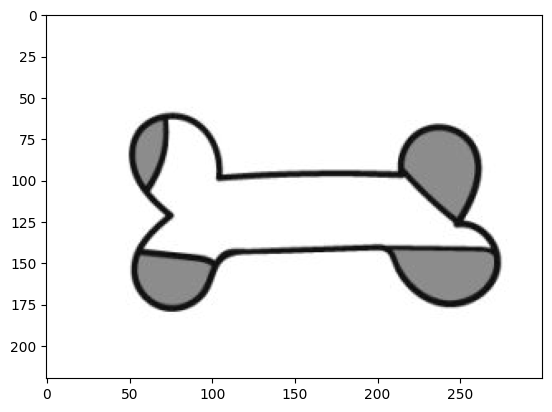

In [94]:
bone = original[880:1100, 1800:2100]
plt.imshow(bone, cmap='gray')
objects.append(bone)

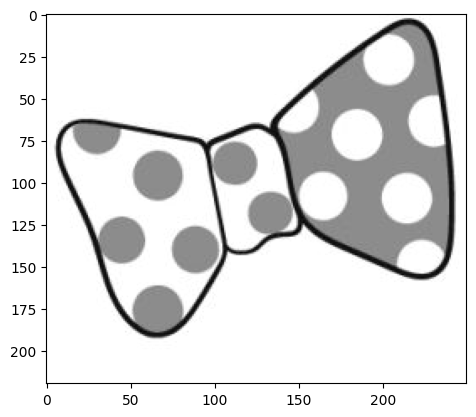

In [95]:
tie = original[880:1100, 2250:2500]
plt.imshow(tie, cmap='gray')
objects.append(tie)

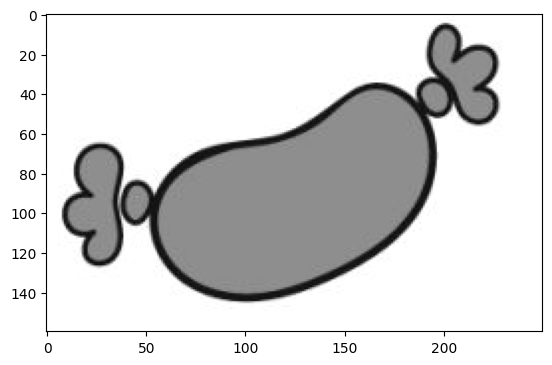

In [96]:
hotdog = original[1210:1370, 2050:2300]
plt.imshow(hotdog, cmap='gray')
objects.append(hotdog)

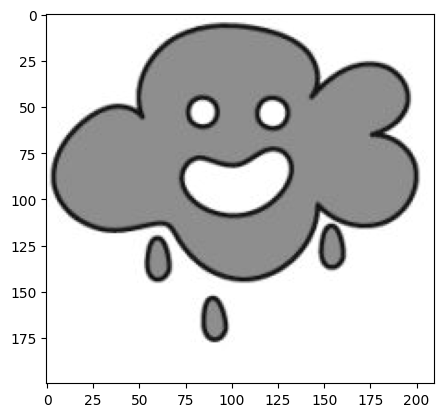

In [97]:
cloud = original[1470:1670, 1850:2060]
plt.imshow(cloud, cmap='gray')
objects.append(cloud)

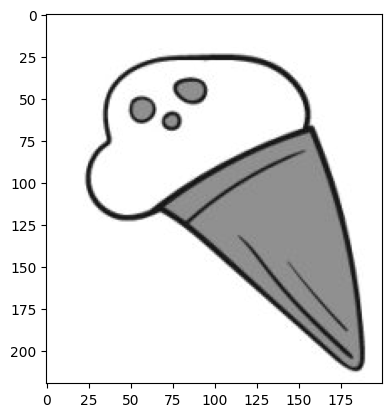

In [98]:
ice_cream2 = original[1380:1600, 2250:2450]
plt.imshow(ice_cream2, cmap='gray')
objects.append(ice_cream2)

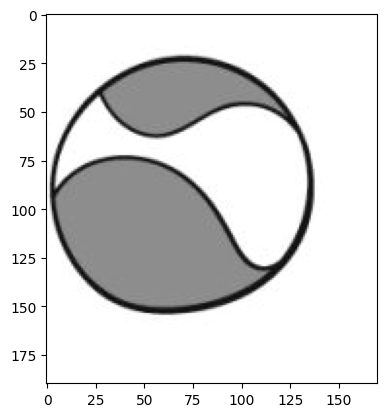

In [99]:
ball = original[1760:1950, 2000:2170]
plt.imshow(ball, cmap='gray')
objects.append(ball)

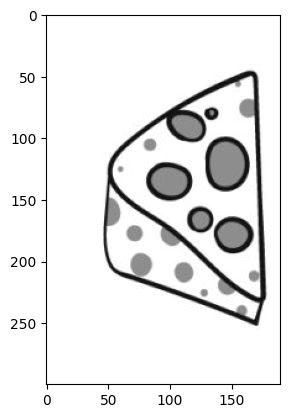

In [100]:
cheese = original[1760:2060, 2210:2400]
plt.imshow(cheese, cmap='gray')
objects.append(cheese)

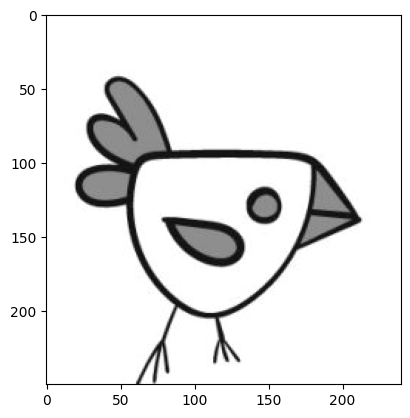

In [101]:
bird = original[2050:2300, 1900:2140]
plt.imshow(bird, cmap='gray')
objects.append(bird)

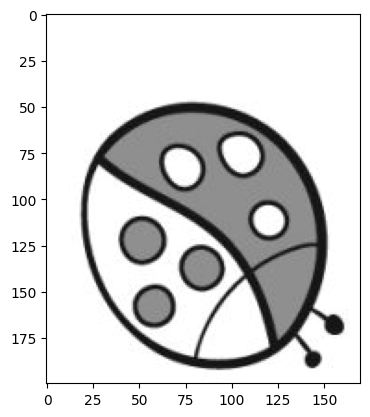

In [102]:
bug = original[2200:2400, 2300:2470]
plt.imshow(bug, cmap='gray')
objects.append(bug)

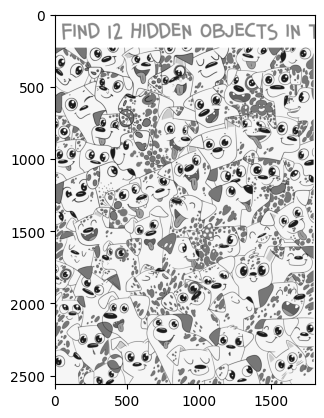

In [103]:

target = original[0:original.shape[0], 0:1800]

plt.imshow(target, cmap='gray')

In [104]:
def edge_detection(image):
    blur = cv2.GaussianBlur(image, (5,5), 0)
    edges = cv2.Canny(blur, 0, 50)
    return edges

In [105]:
len(objects)

12

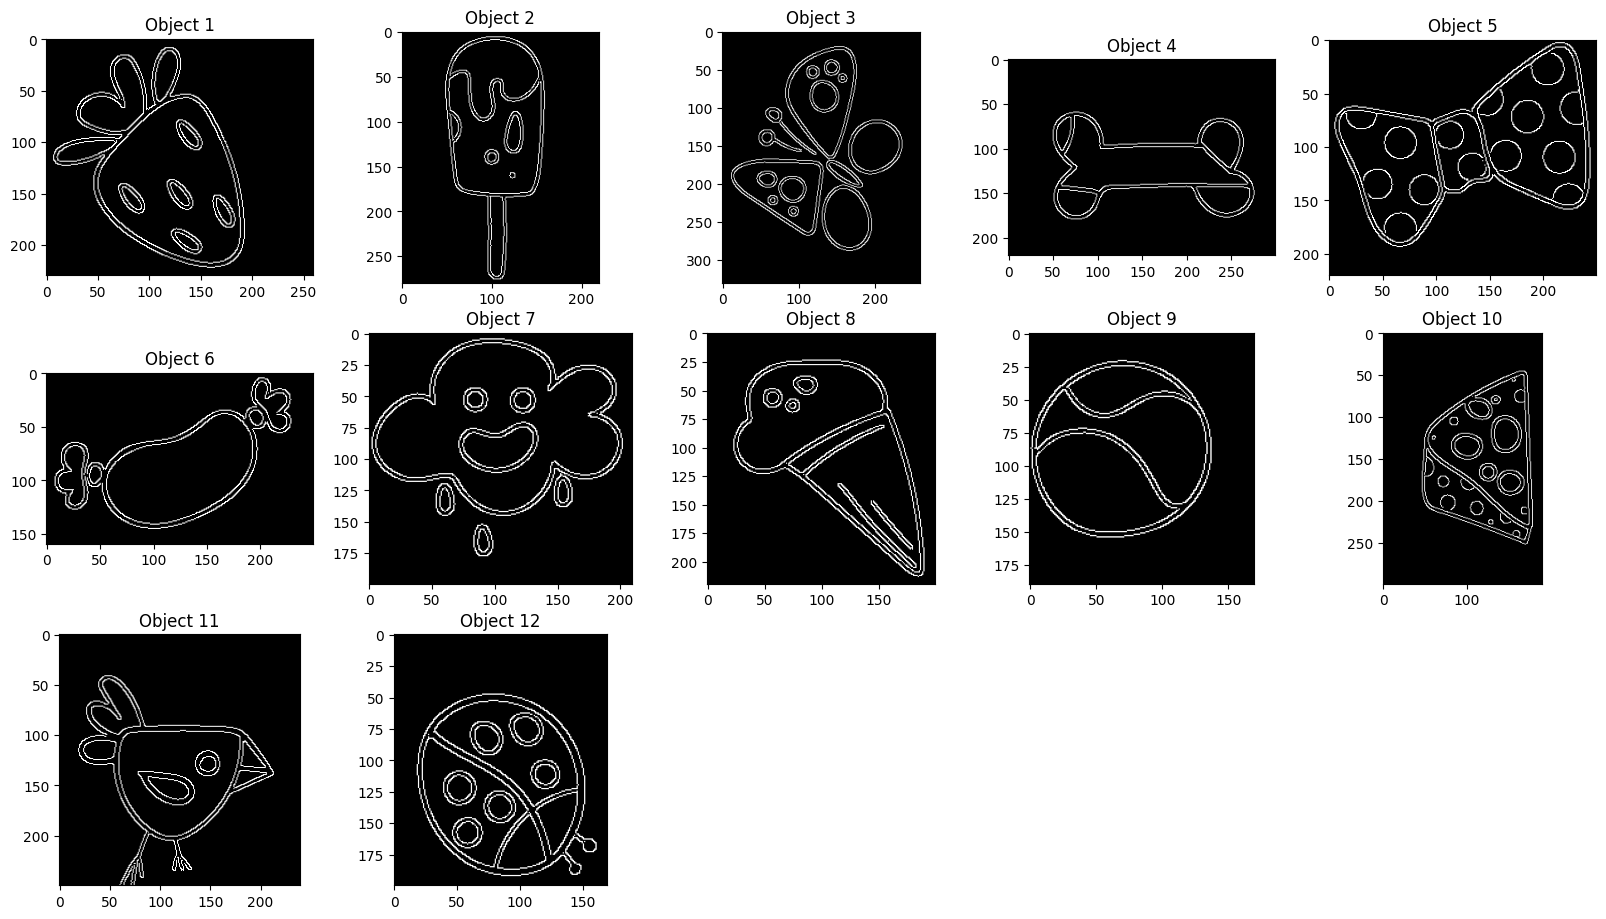

In [106]:

edges = []
for obj in objects:
    edges.append(edge_detection(obj))


plt.figure(figsize=(20, 15))
for i in range(len(objects)):
    plt.subplot(4, 5, i+1)
    plt.imshow(edges[i], cmap='gray')
    plt.title('Object ' + str(i+1))
plt.show()


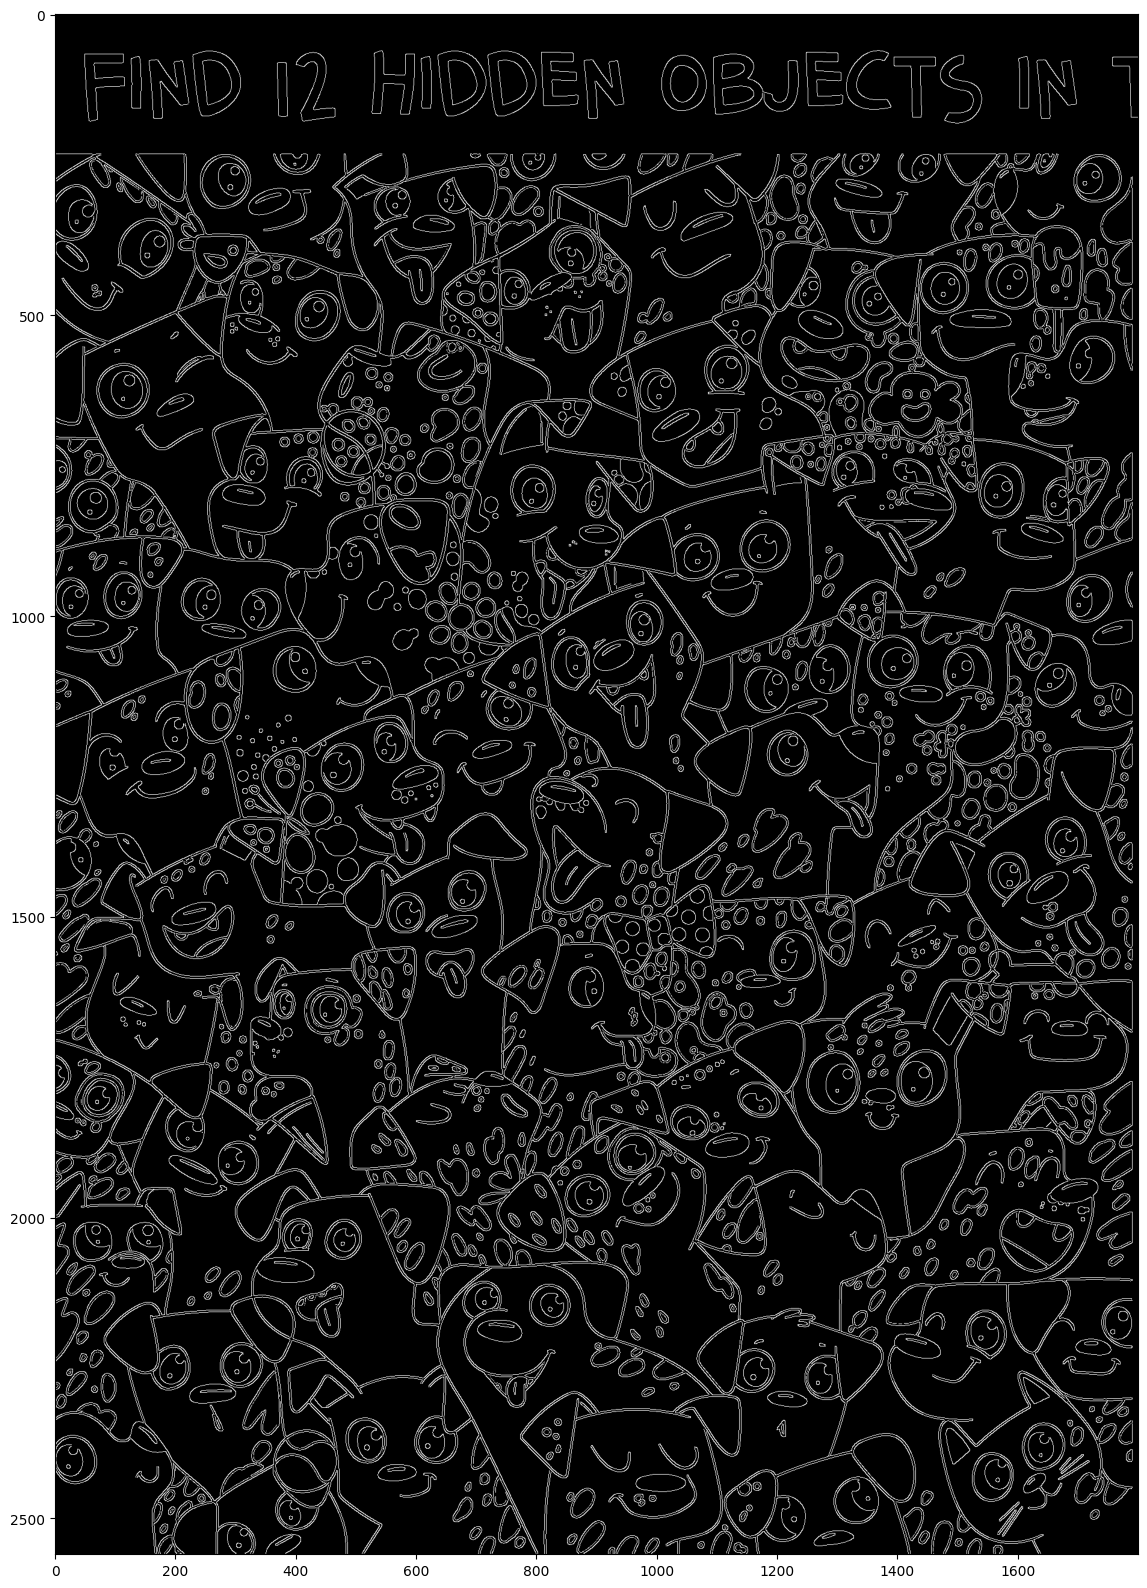

In [107]:

target_edges = edge_detection(target)

plt.figure(figsize=(20, 20))
plt.imshow(target_edges, cmap='gray', )

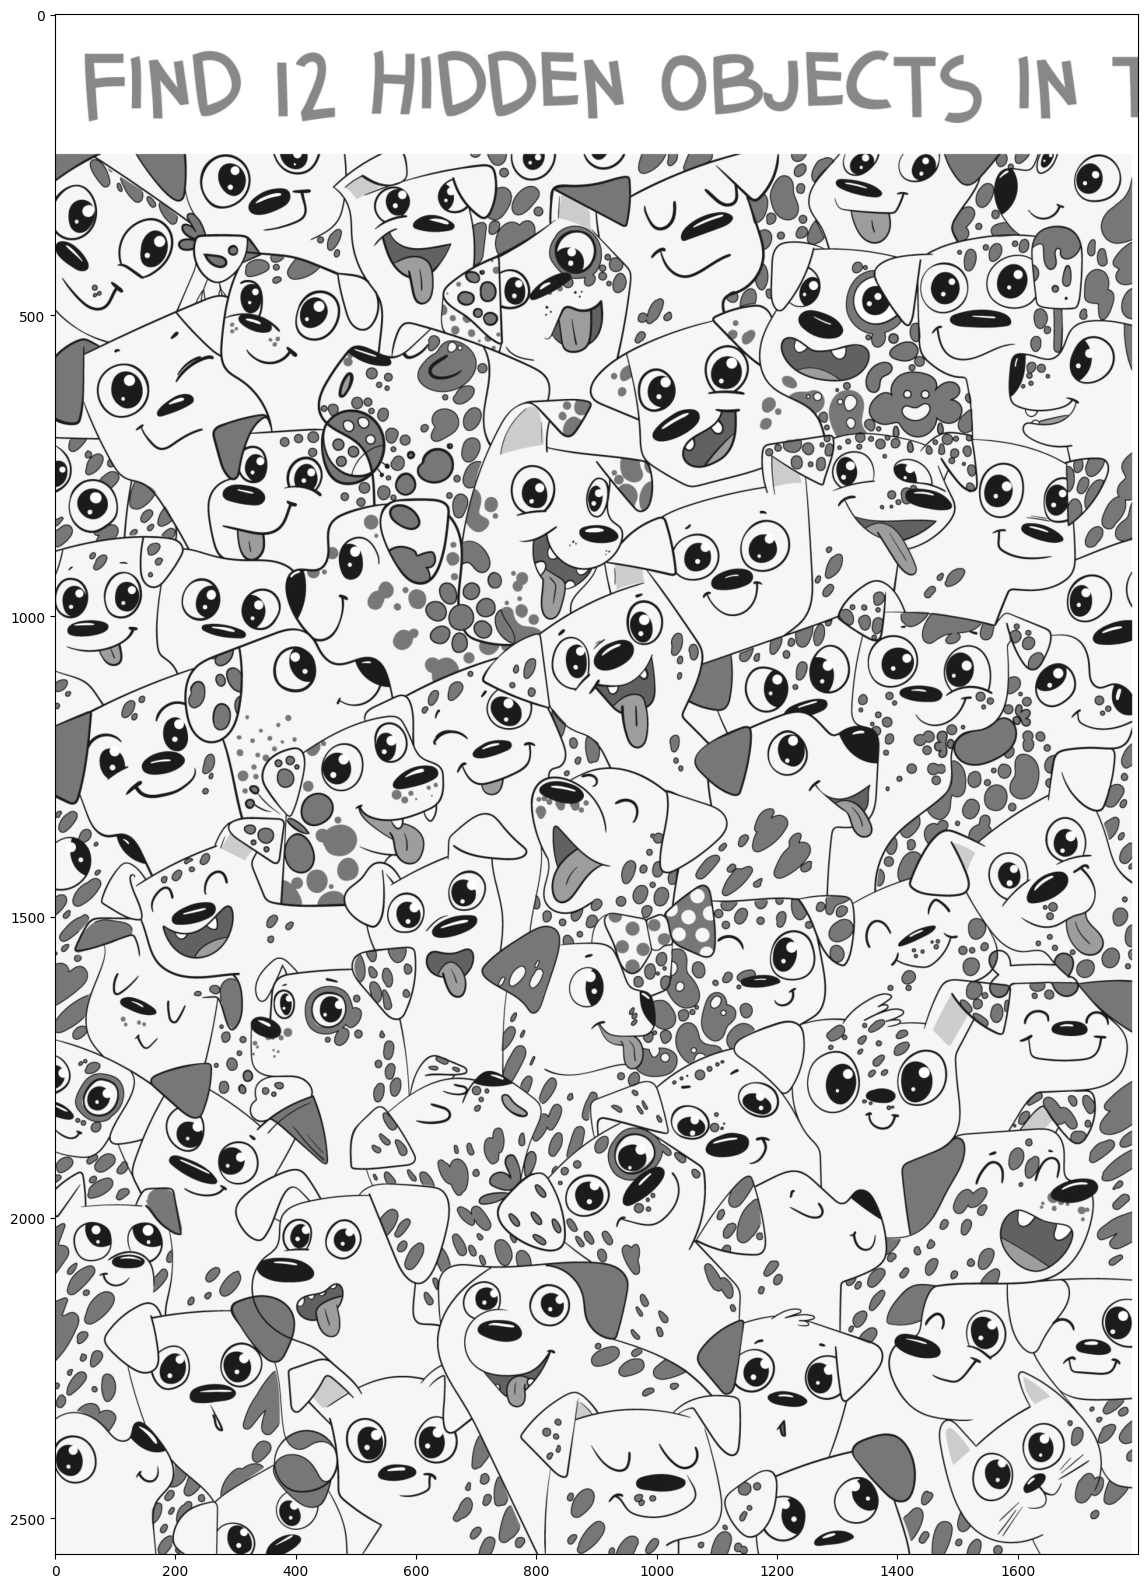

In [108]:
plt.figure(figsize=(20, 20))
plt.imshow(target, cmap='gray')

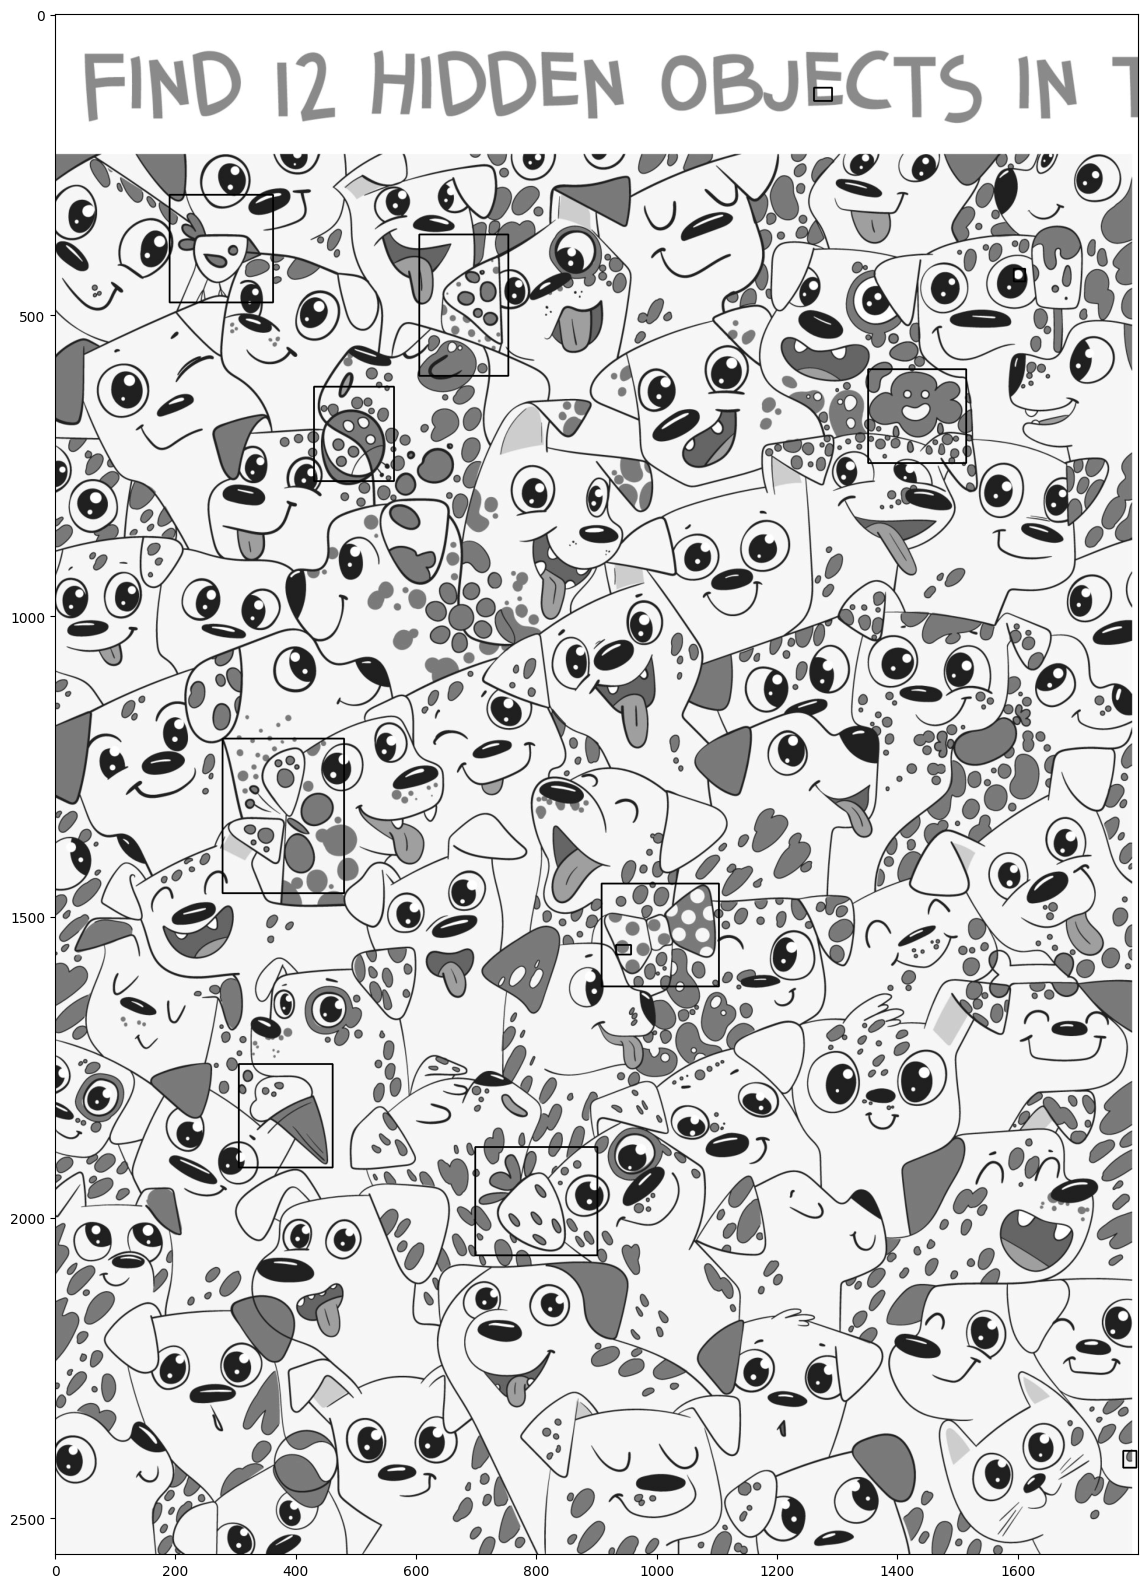

In [109]:
def template_matching(target, template):

    max_val = 0
    best_loc = None
    best_scale = None
    threshold = 0.4

    for scale in np.linspace(0.1, 1.5, 400):
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

        res = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)

        min_val, max_val_curr, min_loc, max_loc = cv2.minMaxLoc(res)

        if max_val_curr >= threshold and max_val_curr > max_val:
            max_val = max_val_curr
            best_loc = max_loc
            best_scale = scale

    if best_loc is not None:
        return best_loc, best_scale
    else:
        print("Object not found.")
        return None, None

locations = []
scales = []
for edge in edges:
    loc, scale = template_matching(target_edges, edge)
    locations.append(loc)
    scales.append(scale)

target_copy = target.copy()
for i, loc in enumerate(locations):
    if loc is not None:

        template_shape = (int(objects[i].shape[1] * scales[i]), int(objects[i].shape[0] * scales[i]))

        cv2.rectangle(target_copy, loc, (loc[0] + template_shape[0], loc[1] + template_shape[1]), (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.imshow(target_copy, cmap='gray')
plt.show()
